In [11]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [12]:
class AgentState(TypedDict):
    n1: int
    n2: int
    n3: int
    n4: int
    operation1: str
    operation2: str

    final1: int
    final2: int

In [13]:
def adder(state:AgentState) -> AgentState:
    state['final1'] = state['n1'] + state['n2']
    return state

def subtractor(state:AgentState) -> AgentState:
    state['final1'] = state['n1'] - state['n2']
    return state

def adder2(state:AgentState) -> AgentState:
    state['final2'] = state['n3'] + state['n4']
    return state

def subtractor2(state:AgentState) -> AgentState:
    state['final2'] = state['n3'] - state['n4']
    return state


def decide_next_node(state:AgentState) -> AgentState:
    if state['operation1'] == '+':
        return "addition_operation"
    elif state['operation1'] == '-':
        return "subtraction_operation"
    
def decide_next_node2(state:AgentState) -> AgentState:
    if state['operation2'] == '+':
        return "addition_operation2"
    elif state['operation2'] == '-':
        return "subtraction_operation2"

In [16]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)
graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state)


graph.add_edge(START, "router")
graph.add_conditional_edges("router", decide_next_node, 
                            {
                                "addition_operation": "add_node",
                                "subtraction_operation": "subtract_node"
                            }
    )

graph.add_conditional_edges("router2", decide_next_node2, 
                            {
                                "addition_operation2": "add_node2",
                                "subtraction_operation2": "subtract_node2"
                            }
    )
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)





app = graph.compile()

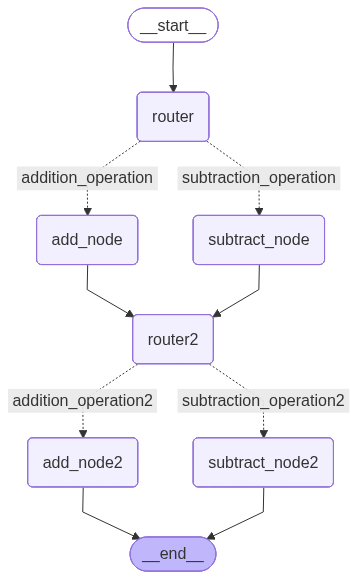

In [17]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
res = app.invoke({
    "n1": 45,
    "n2": 32,
    "n3":467,
    "n4":322,
    "operation1" : "-",
    "operation2" : "+",
})  # type: ignore

In [21]:
print(res['final2'])

789
